# Inference for Linear Regression

**Importing Libraries**

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

### Linear Regression and Testing on Car Crashes Dataset

In [12]:
df = sns.load_dataset('car_crashes')

col_names = ['total', 'speeding', 'alcohol']
df = df[col_names]

# Saying if speeding was greater than 4.5 that they were speeding
def was_speeding(x):
    if x > 4.5:
        return 1
    else:
        return 0

df['was_speeding'] = df['speeding'].apply(was_speeding)


df.head()

,total,speeding,alcohol,was_speeding
0,18.8,7.332,5.640,1
1,18.1,7.421,4.525,1
2,18.6,6.510,5.208,1
3,22.4,4.032,5.824,0
4,12.0,4.200,3.360,0


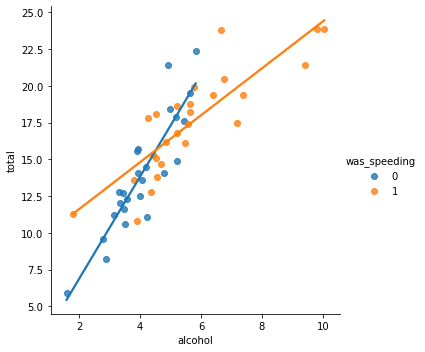

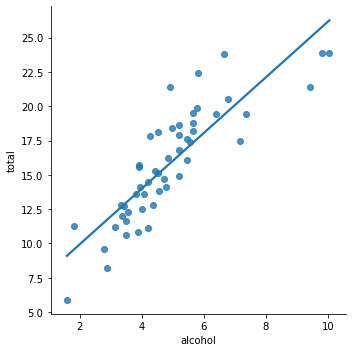

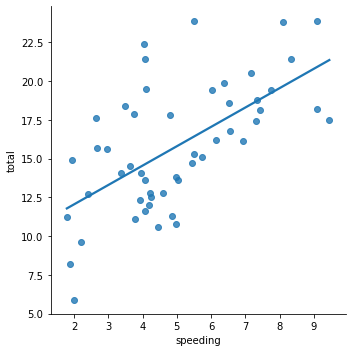

In [15]:
# Regression and plotting for alcohol/speeding and total car crashes
sns.lmplot(data=df, x='alcohol', y='total', hue='was_speeding', ci=None)
sns.lmplot(data=df, x='alcohol', y='total', ci=None)
sns.lmplot(data=df, x='speeding', y='total', ci=None)

plt.show()

### Hypothesis Testing: sample and population means

- null hypothesis = slope is equal to zero

The alternative hypothesis in this case would be that the two variables are related:

- alternative hypothesis = slope is not equal to zero.

**Fitting model and t-tests**

We find that the coef(slope) is not equal to zero
- we reject the null hypthosis
- there is a relationship between 'total' and 'alcohole'

In [21]:
# Creating model with X, Y data

X = df['alcohol']
Y = df['total']

X = sm.add_constant(X)
model = sm.OLS(Y, X)

results = model.fit()

# Look at the results that include the t-statistic
print(results.t_test([1, 0]))



                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.8578      0.921      6.357      0.000       4.006       7.709


**Linear Regression and Confidence Intervals**

In the above table we see that our slope exists within a 95% confidence intervale
- (4.006 - 7.709)

we are 95% confident that the slope coefficient value lies between 4.006 and 7.709.

**Plotting Confidence Intervals**
- scatter plot and confidence interval

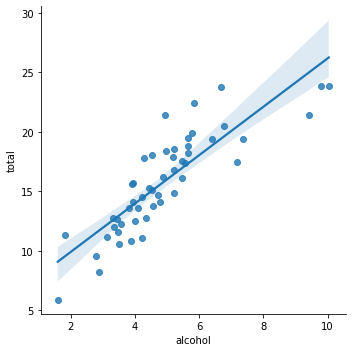

In [31]:
# Create the scatter plot with the confidence interval
sns.lmplot(data=df, x='alcohol', y='total', ci=95) # ci represents our confidence interval

plt.show()

**Linear Regression: When not to use it**
- with variables that have categorical outcomes (like a classification)
- trying to model non-linear relationships
- with outliers (without adjusting for them)

### Categorical Variables

not all data is suited for regression. below is an example of categorical data that doesn't work with regression

[]

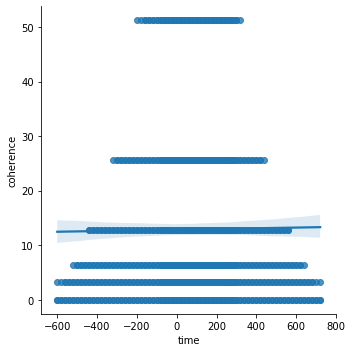

In [33]:
dots = sns.load_dataset("dots")
sns.lmplot(data=dots, x='time', y='coherence', ci=95)

plt.plot()

### Non-linear Data

data that is non'linear is also not a good choice for regression

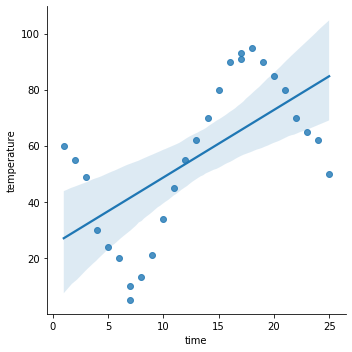

In [35]:
# Simulating temperature data from night to day
data = {'temperature': [60, 55, 49, 30, 24, 20, 10, 5, 13, 21, 34, 45, 55, 62, 70, 80, 90, 91, 93, 95, 90, 85, 80, 70, 65, 62, 50],
        'time': [1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 24, 25]}
df = pd.DataFrame(data=data)

sns.lmplot(data=df, x='time', y='temperature', ci=95)

plt.show()